# Hyperspectral Image autoencoder

1. Import dependencies

In [1]:
import random

import numpy as np
import torch

from torch import nn
from torch.utils.data import DataLoader

from src.util.torch import resolve_torch_device
from src.data.indian_pines import create_indian_pines_dataset
from src.model.autoencoder import SymmetricPointWiseAutoEncoder
from src.trainer.autoencoder_trainer import AutoEncoderTrainer
from src.visualization.plot import plot_epoch_generic
from src.trainer.base_trainer import AdamOptimizedModule

2. Prepare env

In [2]:
random_seed = 42

random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

device = resolve_torch_device()

generator = torch.Generator()
generator.manual_seed(random_seed)

image_h = 145
image_w = 145
num_classes = 17


3. Set params

In [3]:
activation = "relu"
epochs = 75
learning_rate = 1e-3

units = [200, 128, 64, 32, 17]

4. Load dataset

In [4]:
_, dataset = create_indian_pines_dataset()

In [5]:
train_loader = DataLoader(dataset)

5. Train model

In [6]:
autoencoder = SymmetricPointWiseAutoEncoder(units)

In [7]:
autoencoder

SymmetricPointWiseAutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(200, 128, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
    (6): Conv2d(32, 17, kernel_size=(1, 1), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): Conv2d(17, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
    (6): Conv2d(128, 200, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [8]:
model = AdamOptimizedModule(net=autoencoder, lr=learning_rate)
trainer = AutoEncoderTrainer(
    nn.MSELoss(),
    epochs,
    device,
)

In [9]:
feedback = trainer.fit(model, train_loader)

  0%|          | 0/75 [00:00<?, ?it/s]

6. Training results

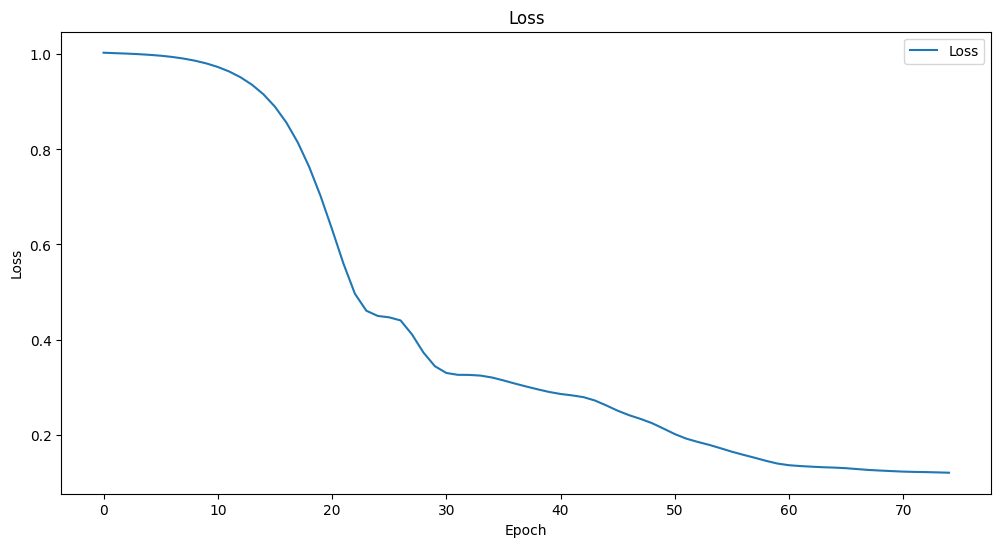

In [10]:
plot_epoch_generic([it.train["train_loss"] for it in feedback.history])